# Step 1: Load the Data

In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv("diamonds.csv")

# View first few rows
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Step 2: Identify Input and Output Variables

In [15]:
# Separate input and output
X = df.drop("price", axis=1)
y = df["price"]

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (53940, 9)
Output shape: (53940,)


# Step 3: Split the Data (Train : Test = 75 : 25)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size :", X_test.shape)


Training size: (40455, 9)
Testing size : (13485, 9)


# Step 4: Data Preprocessing on X_train
4.1 Handle Categorical Encoding
## Columns to encode: cut, color, clarity

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ["cut", "color", "clarity"]
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)


4.2 Numerical Rescaling (Standardization)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


# Step 5: Apply Preprocessing on Train and Test

In [19]:
# Fit on training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform test data
X_test_processed = preprocessor.transform(X_test)

# Scale numerical features after encoding
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

print("Processed Train shape:", X_train_scaled.shape)
print("Processed Test shape :", X_test_scaled.shape)


Processed Train shape: (40455, 26)
Processed Test shape : (13485, 26)


# Step 6: Build KNN from Scratch and Predict

In [23]:
import numpy as np

def knn_predict_fast(X_train, y_train, X_test, k=5):
    predictions = []
    
    for test_point in X_test:
        # Vectorized distance computation
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:k]
        
        # Average their target values
        k_values = y_train.iloc[k_indices]
        predictions.append(np.mean(k_values))
    
    return np.array(predictions)


In [24]:
k = 5
y_pred_scratch = knn_predict_fast(X_train_scaled, y_train, X_test_scaled, k=k)


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Scratch KNN predictions
mae = mean_absolute_error(y_test, y_pred_scratch)
mse = mean_squared_error(y_test, y_pred_scratch)
r2  = r2_score(y_test, y_pred_scratch)

print("Scratch KNN Performance:")
print("MAE :", mae)
print("MSE :", mse)
print("R2  :", r2)


Scratch KNN Performance:
MAE : 428.9275491286615
MSE : 715843.0385761957
R2  : 0.9544330311859696


# Step 8: Train Using sklearn KNN and Compare

Train sklearn KNN Regressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor

# Build sklearn KNN model
knn_sklearn = KNeighborsRegressor(
    n_neighbors=5,
    metric="euclidean",
    weights="distance"   # optional, improves performance
)

# Train the model
knn_sklearn.fit(X_train_scaled, y_train)


KNeighborsRegressor(metric='euclidean', weights='distance')

Predict on Test Data

In [34]:
y_pred_sklearn = knn_sklearn.predict(X_test_scaled)

# Preview predictions
y_pred_sklearn[:10]


array([ 572.83143554, 2415.88027407, 1107.52263338, 1246.42188781,
       9744.19682714, 3880.43862024, 1753.49938471, 1829.39821561,
       2399.08823984, 6406.04163584])

Evaluate sklearn KNN Model

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_s = mean_absolute_error(y_test, y_pred_sklearn)
mse_s = mean_squared_error(y_test, y_pred_sklearn)
r2_s  = r2_score(y_test, y_pred_sklearn)

print("Sklearn KNN Performance:")
print("MAE :", mae_s)
print("MSE :", mse_s)
print("R2  :", r2_s)


Sklearn KNN Performance:
MAE : 393.24871767906643
MSE : 615278.7759437977
R2  : 0.9608344465413396


Evaluate sklearn KNN Model

In [36]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Scratch KNN", "Sklearn KNN"],
    "MAE": [mae, mae_s],
    "MSE": [mse, mse_s],
    "R2 Score": [r2, r2_s]
})

comparison


,Model,MAE,MSE,R2 Score
0,Scratch KNN,428.927549,715843.038576,0.954433
1,Sklearn KNN,393.248718,615278.775944,0.960834


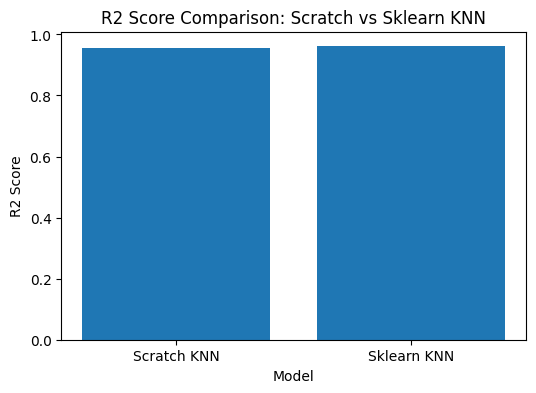

In [37]:
import matplotlib.pyplot as plt

models = ["Scratch KNN", "Sklearn KNN"]
r2_scores = [r2, r2_s]

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("R2 Score Comparison: Scratch vs Sklearn KNN")
plt.show()


Compare Scratch vs Sklearn Results

In [38]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Scratch KNN", "Sklearn KNN"],
    "MAE": [mae, mae_s],
    "MSE": [mse, mse_s],
    "R2 Score": [r2, r2_s]
})

comparison


,Model,MAE,MSE,R2 Score
0,Scratch KNN,428.927549,715843.038576,0.954433
1,Sklearn KNN,393.248718,615278.775944,0.960834
